<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Applying Pandas to strings


In this notebook, we test some of the concepts we've learned for Pandas application on strings.

## Learning objectives

By the end of this train, you should be able to:
- Demonstrate the ability to apply Pandas concepts in Python.

## Exercises

**Project scenario**: Environmental data analysis

**Background**: You are working with an environmental organisation that focuses on conserving natural habitats. You have been given a dataset containing detailed records of various conservation projects, environmental incidents, and initiatives. Your task is to extract and analyse specific information from this dataset to aid decision-making and reporting.

**Dataset structure**: The DataFrame `environment_df` contains the columns: 'ID', 'Description', 'Date', 'Location', 'Budget', and 'Notes'.

In [12]:
import pandas as pd
import re

data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Description': [
        'Forest Conservation Project in Spain',
        'River Cleanup Initiative Project 2021 in Portugal',
        'Urban Gardening Community Project in Germany',
        'Forest Reforestation Project 2022 in France',
        'Wildlife Protection Project Plan in Italy',
        'Endangered Species Conservation Project in Greece',
        'Wetland Restoration Project in Spain',
        'Marine Life Conservation Project in Portugal',
        'Air Quality Improvement Project Initiative in Germany',
        'Habitat Preservation Project for Birds in France'
    ],
    'Date': ['2021-03-15', '2021-06-20', '2022-01-11', '2022-04-05', '2023-02-22', '2023-05-30', '2021-09-13', '2022-07-19', '2023-03-08', '2022-11-21'],
    'Location': ['madrid, spain', 'LISBON, Portugal', 'berlin, germany', 'Paris, France', 'rome, Italy', 'Athens, GREECE', 'Valencia, Spain', 'PORTO, Portugal', 'Munich, Germany', 'Lyon, France'],
    'Budget': ['$20000', '€15000', '€12000', '£18000', '$25000', '€20000', '$17000', '€13000', '€11000', '£16000'],
    'Notes': [
        'Focusing on native forest species in Spain',
        'Cleanup of the Tagus river in Portugal. Endangered species alert!',
        'Community project in urban Berlin, Germany',
        'Reforestation of oak trees in Paris, France',
        'Plan for protecting local wildlife in Italy. Endangered species identified.',
        'Study on the impact on endangered bird species in Greece',
        'Restoration of wetlands in Valencia, Spain',
        'Conservation of marine life in Porto, Portugal',
        'Initiative for improving air quality in Munich, Germany',
        'Preservation of bird habitats in Lyon, France'
    ]
}



environment_df = pd.DataFrame(data)

print(environment_df)

   ID                                        Description        Date  \
0   1               Forest Conservation Project in Spain  2021-03-15   
1   2  River Cleanup Initiative Project 2021 in Portugal  2021-06-20   
2   3       Urban Gardening Community Project in Germany  2022-01-11   
3   4        Forest Reforestation Project 2022 in France  2022-04-05   
4   5          Wildlife Protection Project Plan in Italy  2023-02-22   
5   6  Endangered Species Conservation Project in Greece  2023-05-30   
6   7               Wetland Restoration Project in Spain  2021-09-13   
7   8       Marine Life Conservation Project in Portugal  2022-07-19   
8   9  Air Quality Improvement Project Initiative in ...  2023-03-08   
9  10   Habitat Preservation Project for Birds in France  2022-11-21   

           Location  Budget                                              Notes  
0     madrid, spain  $20000         Focusing on native forest species in Spain  
1  LISBON, Portugal  €15000  Cleanup of the T

### Exercise 1

Standardise the format of the 'Location' column where each location should be in the format "City, Country". Additionally, extract the year from the 'Date' column and create a new column, 'Year'.

In [13]:
# insert code here
environment_df['Location'] = (
    environment_df['Location']
    .astype(str)  # ensure string type
    .str.strip()  # remove leading/trailing spaces
    .str.replace(r'\s*,\s*', ',', regex=True)  # normalize comma spacing
    .apply(lambda x: ', '.join([w.strip().title() for w in x.split(',')]))  # title-case city + country
)

# 2️⃣ Extract the year from 'Date'
environment_df['Year'] = pd.to_datetime(environment_df['Date'], errors='coerce').dt.year

# 3️⃣ Print the cleaned results
print(environment_df[['Location', 'Year']])

           Location  Year
0     Madrid, Spain  2021
1  Lisbon, Portugal  2021
2   Berlin, Germany  2022
3     Paris, France  2022
4       Rome, Italy  2023
5    Athens, Greece  2023
6   Valencia, Spain  2021
7   Porto, Portugal  2022
8   Munich, Germany  2023
9      Lyon, France  2022


In [10]:
print(environment_df.columns.tolist())


['ID', 'Description', 'Date', 'Location', 'Budget', 'Notes', 'Year']


In [15]:
print(environment_df['Location'].values)


['Madrid, Spain' 'Lisbon, Portugal' 'Berlin, Germany' 'Paris, France'
 'Rome, Italy' 'Athens, Greece' 'Valencia, Spain' 'Porto, Portugal'
 'Munich, Germany' 'Lyon, France']


### Exercise 2

Calculate the total budget allocated to "forest"-related projects. Assume that the 'Budget' column is in string format with various currency symbols, and convert it to a numeric format for calculations.

Hint:
1. Identify the currency of each budget amount.
2. Convert each amount to USD.
3. Sum the converted amounts.

In [22]:
# Fixed conversion rates
conversion_rates = {'$': 1.0, '€': 1.1, '£': 1.3}  # Rates: 1 Euro = 1.1 USD, 1 Pound = 1.3 USD

# 1️⃣ Filter rows with 'forest' in Description
forest_df = environment_df[environment_df['Description'].str.contains('forest', case=False, na=False)].copy()


# 2️⃣ Define conversion function
def convert_to_usd(budget):
    if pd.isna(budget):
        return 0
    symbol = budget[0]  # first character (currency symbol)
    amount = float(budget[1:].replace(',', '').strip())  # remove symbol and commas
    return amount * conversion_rates.get(symbol, 1)  # default 1 if unknown

# 3️⃣ Apply conversion to get USD values
forest_df['Budget_USD'] = forest_df['Budget'].apply(convert_to_usd)

# 4️⃣ Calculate total forest-related budget
total_forest_budget = forest_df['Budget_USD'].sum()

# 5️⃣ Print results
print(forest_df[['Description', 'Budget', 'Budget_USD']])
print(f"\n🌲 Total Forest-related Budget (in USD): ${total_forest_budget:,.2f}")


                                   Description  Budget  Budget_USD
0         Forest Conservation Project in Spain  $20000     20000.0
3  Forest Reforestation Project 2022 in France  £18000     23400.0

🌲 Total Forest-related Budget (in USD): $43,400.00


In [24]:
# Step 1: Filter forest-related projects
forest_df = environment_df[environment_df['Description'].str.contains('forest', case=False, na=False)].copy()

# Step 2: Define conversion rates (to USD)
conversion_rates = {'$': 1.0, '€': 1.1, '£': 1.3}

# Step 3: Function to convert budget strings to USD
def convert_to_usd(budget):
    if pd.isna(budget):
        return 0
    symbol = budget[0]  # Get currency symbol
    amount = float(budget[1:].replace(',', '').strip())  # Remove commas & convert
    return amount * conversion_rates.get(symbol, 1)  # Convert to USD

# Step 4: Apply conversion
forest_df['Budget_USD'] = forest_df['Budget'].apply(convert_to_usd)

# Step 5: Calculate total
total_forest_budget = forest_df['Budget_USD'].sum()

# Step 6: Output
print(forest_df[['Description', 'Budget', 'Budget_USD']])
print(f"\n🌲 Total Forest-related Budget (in USD): ${total_forest_budget:,.2f}")


                                   Description  Budget  Budget_USD
0         Forest Conservation Project in Spain  $20000     20000.0
3  Forest Reforestation Project 2022 in France  £18000     23400.0

🌲 Total Forest-related Budget (in USD): $43,400.00


### Exercise 3

Identify all records (`Notes` column) that mention endangered species and tag these records in a new column, '`Endangered_species`', with a 'Yes' or 'No' flag.

In [27]:
environment_df['Endangered_species'] = environment_df['Notes'].apply(
    lambda x: 'Yes' if isinstance(x, str) and 'endangered' in x.lower() else 'No'
)
print(environment_df[['Description', 'Notes', 'Endangered_species']])

                                         Description  \
0               Forest Conservation Project in Spain   
1  River Cleanup Initiative Project 2021 in Portugal   
2       Urban Gardening Community Project in Germany   
3        Forest Reforestation Project 2022 in France   
4          Wildlife Protection Project Plan in Italy   
5  Endangered Species Conservation Project in Greece   
6               Wetland Restoration Project in Spain   
7       Marine Life Conservation Project in Portugal   
8  Air Quality Improvement Project Initiative in ...   
9   Habitat Preservation Project for Birds in France   

                                               Notes Endangered_species  
0         Focusing on native forest species in Spain                 No  
1  Cleanup of the Tagus river in Portugal. Endang...                Yes  
2         Community project in urban Berlin, Germany                 No  
3        Reforestation of oak trees in Paris, France                 No  
4  Plan for p

In [28]:
environment_df['Endangered_species'] = (
    environment_df['Notes']
    .str.contains('endangered', case=False, na=False)
    .map({True: 'Yes', False: 'No'})
)
print(environment_df[['Description', 'Notes', 'Endangered_species']])

                                         Description  \
0               Forest Conservation Project in Spain   
1  River Cleanup Initiative Project 2021 in Portugal   
2       Urban Gardening Community Project in Germany   
3        Forest Reforestation Project 2022 in France   
4          Wildlife Protection Project Plan in Italy   
5  Endangered Species Conservation Project in Greece   
6               Wetland Restoration Project in Spain   
7       Marine Life Conservation Project in Portugal   
8  Air Quality Improvement Project Initiative in ...   
9   Habitat Preservation Project for Birds in France   

                                               Notes Endangered_species  
0         Focusing on native forest species in Spain                 No  
1  Cleanup of the Tagus river in Portugal. Endang...                Yes  
2         Community project in urban Berlin, Germany                 No  
3        Reforestation of oak trees in Paris, France                 No  
4  Plan for p

### Exercise 4

Generate a report which shows, for each country, the number of projects, the average budget per project for that country, and a list of the top three most common project types across all the countries. Assume 'Project Type' is part of the 'Description' and can be obtained by finding the text before the word 'Project'.

In [30]:
# insert code here
# --- Step 1️⃣: Extract the country name from 'Location' ---
environment_df['Country'] = environment_df['Location'].str.split(',').str[-1].str.strip().str.title()

# --- Step 2️⃣: Extract 'Project Type' (text before the word 'Project') ---
environment_df['Project_Type'] = environment_df['Description'].str.extract(r'^(.*?)\s*Project', expand=False).str.strip()

# --- Step 3️⃣: Convert Budget to numeric (remove currency symbols and convert to float) ---
environment_df['Budget_clean'] = environment_df['Budget'].replace('[^0-9.]', '', regex=True).astype(float)

# --- Step 4️⃣: Group by country to find total projects and average budget ---
report = environment_df.groupby('Country').agg(
    Number_of_Projects=('ID', 'count'),
    Average_Budget=('Budget_clean', 'mean')
).reset_index()

# --- Step 5️⃣: Find the 3 most common project types overall ---
top_project_types = (
    environment_df['Project_Type']
    .value_counts()
    .head(3)
    .index
    .tolist()
)

# --- Step 6️⃣: Print report ---
print("🌍 Country Report:")
print(report)
print("\n🏆 Top 3 Most Common Project Types:")
print(top_project_types)

🌍 Country Report:
    Country  Number_of_Projects  Average_Budget
0    France                   2         17000.0
1   Germany                   2         11500.0
2    Greece                   1         20000.0
3     Italy                   1         25000.0
4  Portugal                   2         14000.0
5     Spain                   2         18500.0

🏆 Top 3 Most Common Project Types:
['Forest Conservation', 'River Cleanup Initiative', 'Urban Gardening Community']


In [32]:

# Step 1: Define conversion rates
conversion_rates = {'$': 1.0, '€': 1.1, '£': 1.3}

# Step 2: Convert budgets to USD
def convert_to_usd(budget):
    if pd.isna(budget):
        return 0
    symbol = budget[0]
    amount = float(budget[1:].replace(',', '').strip())
    return amount * conversion_rates.get(symbol, 1)

environment_df['Budget_USD'] = environment_df['Budget'].apply(convert_to_usd)

# Step 3: Extract country from Location
environment_df['Country'] = (
    environment_df['Location']
    .str.split(',')
    .str[-1]
    .str.strip()
    .str.title()
)

# Step 4: Extract project type
environment_df['Project_Type'] = (
    environment_df['Description']
    .str.extract(r'^(.*?)\s*Project', expand=False)
    .str.strip()
)

# Step 5: Group by country
report = (
    environment_df.groupby('Country')
    .agg(
        Number_of_Projects=('ID', 'count'),
        Average_Budget_USD=('Budget_USD', 'mean')
    )
    .reset_index()
)

# Step 6: Find top 3 most common project types
top_project_types = (
    environment_df['Project_Type']
    .value_counts()
    .head(3)
    .index
    .tolist()
)

# Step 7: Print report
print("🌍 Country Report:")
print(report)
print("\n🏆 Top 3 Most Common Project Types:")
print(top_project_types)


🌍 Country Report:
    Country  Number_of_Projects  Average_Budget_USD
0    France                   2             22100.0
1   Germany                   2             12650.0
2    Greece                   1             22000.0
3     Italy                   1             25000.0
4  Portugal                   2             15400.0
5     Spain                   2             18500.0

🏆 Top 3 Most Common Project Types:
['Forest Conservation', 'River Cleanup Initiative', 'Urban Gardening Community']


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14760\1675643887.py:4: SyntaxWarning: invalid escape sequence '\$'
  environment_df['Budget_USD'] = environment_df['Budget'].replace({'\$': '', '€': '', '£': ''}, regex=True).astype(float)


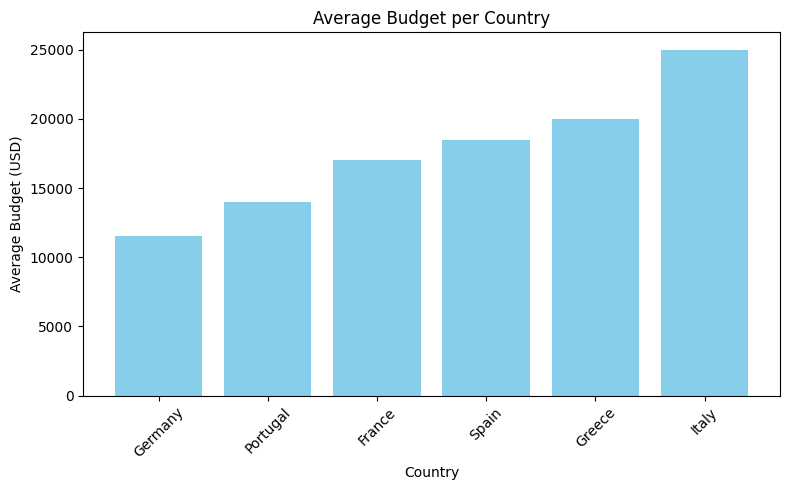

In [33]:
import matplotlib.pyplot as plt

# Step 1: Clean the Budget column (remove symbols and convert to numeric)
environment_df['Budget_USD'] = environment_df['Budget'].replace({'\$': '', '€': '', '£': ''}, regex=True).astype(float)

# Step 2: Extract Country from the 'Location' column
environment_df['Country'] = environment_df['Location'].str.split(',').str[-1].str.strip()

# Step 3: Calculate the average budget per country
avg_budget = environment_df.groupby('Country')['Budget_USD'].mean().sort_values()

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.bar(avg_budget.index, avg_budget.values, color='skyblue')
plt.title('Average Budget per Country')
plt.xlabel('Country')
plt.ylabel('Average Budget (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Solutions

### Exercise 1

In [14]:
# Standardising 'Location'
environment_df['Location'] = environment_df['Location'].apply(lambda x: x.title())

# Extracting 'Year'
environment_df['Year'] = pd.to_datetime(environment_df['Date']).dt.year

print(environment_df)

   ID                                        Description        Date  \
0   1               Forest Conservation Project in Spain  2021-03-15   
1   2  River Cleanup Initiative Project 2021 in Portugal  2021-06-20   
2   3       Urban Gardening Community Project in Germany  2022-01-11   
3   4        Forest Reforestation Project 2022 in France  2022-04-05   
4   5          Wildlife Protection Project Plan in Italy  2023-02-22   
5   6  Endangered Species Conservation Project in Greece  2023-05-30   
6   7               Wetland Restoration Project in Spain  2021-09-13   
7   8       Marine Life Conservation Project in Portugal  2022-07-19   
8   9  Air Quality Improvement Project Initiative in ...  2023-03-08   
9  10   Habitat Preservation Project for Birds in France  2022-11-21   

           Location  Budget  \
0     Madrid, Spain  $20000   
1  Lisbon, Portugal  €15000   
2   Berlin, Germany  €12000   
3     Paris, France  £18000   
4       Rome, Italy  $25000   
5    Athens, Greece  

**Standardising 'Location'**: This line converts all characters in the 'Location' column to title case (first letter of each word capitalised). It ensures consistency in the format of location names.

**Extracting 'Year'**: This line extracts the year from the 'Date' column. It first converts the 'Date' column to a datetime object using `pd.to_datetime` and then extracts the year component from this datetime object, adding it as a new column, 'Year', in the DataFrame.

### Exercise 2

In [23]:
# Fixed conversion rates
conversion_rates = {'$': 1.0, '€': 1.1, '£': 1.3}  # Example rates: 1 Euro = 1.1 USD, 1 Pound = 1.3 USD

def convert_to_usd(budget_str):
    # Extracting the currency symbol and amount
    currency_symbol = budget_str[0]
    amount = float(budget_str[1:])

    # Converting to USD
    if currency_symbol in conversion_rates:
        return amount * conversion_rates[currency_symbol]
    else:
        return amount

# Converting 'Budget' to numeric USD values
environment_df['Budget_USD'] = environment_df['Budget'].apply(convert_to_usd)

# Calculating total budget for "forest"-related projects in USD
total_budget_forest_usd = environment_df[environment_df['Description'].str.contains("forest", case=False)]['Budget_USD'].sum()
print(total_budget_forest_usd)


43400.0


* The `convert_to_usd` function extracts the currency symbol and amount from each budget string. It then converts the amount to USD using the given conversion rates.
* We then apply this function to the 'Budget' column to create a new 'Budget_USD' column, where all values are in USD.
* Finally, we calculate the total budget for "forest"-related projects using this standardised 'Budget_USD' column.

### Exercise 3

This code uses regex to check if the words "endangered species" appear in the 'Notes' column of `environment_df`. If it does, the corresponding row in the new '`Endangered_species`' column is marked 'Yes', otherwise 'No'. The search is case insensitive.

In [29]:
# Using regex to identify mentions of endangered species
environment_df['Endangered_species'] = environment_df['Notes'].str.contains(r'endangered species', flags=re.IGNORECASE).map({True: 'Yes', False: 'No'})

print(environment_df)

   ID                                        Description        Date  \
0   1               Forest Conservation Project in Spain  2021-03-15   
1   2  River Cleanup Initiative Project 2021 in Portugal  2021-06-20   
2   3       Urban Gardening Community Project in Germany  2022-01-11   
3   4        Forest Reforestation Project 2022 in France  2022-04-05   
4   5          Wildlife Protection Project Plan in Italy  2023-02-22   
5   6  Endangered Species Conservation Project in Greece  2023-05-30   
6   7               Wetland Restoration Project in Spain  2021-09-13   
7   8       Marine Life Conservation Project in Portugal  2022-07-19   
8   9  Air Quality Improvement Project Initiative in ...  2023-03-08   
9  10   Habitat Preservation Project for Birds in France  2022-11-21   

           Location  Budget  \
0     Madrid, Spain  $20000   
1  Lisbon, Portugal  €15000   
2   Berlin, Germany  €12000   
3     Paris, France  £18000   
4       Rome, Italy  $25000   
5    Athens, Greece  

### Exercise 4

This code extracts 'Country' and 'Project Type' from the 'Location' and 'Description' columns respectively, generates a report summarising total projects and average budget by country, and identifies the top three most common project types in the dataset.

In [31]:
# Extract 'Country' from 'Location'
environment_df['Country'] = environment_df['Location'].apply(lambda x: x.split(', ')[-1])

# Extract 'Project Type' from 'Description'
environment_df['Project_Type'] = environment_df['Description'].str.extract(r'(\b\w+\b) Project')[0]

# Generate the report
report = environment_df.groupby('Country').agg(
    Total_Projects=('ID', 'count'),
    Average_Budget=('Budget_USD', 'mean')
)

# Identify top three most common project types
top_project_types = environment_df['Project_Type'].value_counts().nlargest(3).index.tolist()
report['Top_Project_Types'] = ', '.join(top_project_types)

print(report)

          Total_Projects  Average_Budget                    Top_Project_Types
Country                                                                      
France                 2         22100.0  Conservation, Initiative, Community
Germany                2         12650.0  Conservation, Initiative, Community
Greece                 1         22000.0  Conservation, Initiative, Community
Italy                  1         25000.0  Conservation, Initiative, Community
Portugal               2         15400.0  Conservation, Initiative, Community
Spain                  2         18500.0  Conservation, Initiative, Community


#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/refs/heads/master/ALX_banners/ALX_Navy.png"  style="width:140px";/>
</div>